<a href="https://colab.research.google.com/github/UzunDemir/8_Recommender_Systems/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9A%D0%BE%D0%BD%D1%82%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D1%80%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.6 Практическая работа

### Цель практической работы
Научиться строить прототип рекомендательной системы с помощью подхода content-based и получать baseline.

Работа должна быть выполнена в среде Jupyter Notebook.

Данные лежат по адресу https://github.com/zygmuntz/goodbooks-10k.

Жанры можно скачать отсюда: [goodreads_book_genres_initial.json.gz](https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_book_genres_initial.json.gz)



### Что входит в практическую работу
* Векторизовать названия книг и заменить фичи TF-IDF на альтернативные эмбеддинги текста, создать дополнительные признаки.
* Построить модель многоклассовой классификации или регрессии, сделать выводы.
Получить описания книг с помощью библиотеки requests или поработать с JSON-файлами.


### Что нужно сделать
#### Задача 1
* Для начала определитесь, к какой задаче ML вы сведёте нашу бизнес-задачу (построение рекомендательной системы) — к классификации или регрессии.
* Подумайте над метриками, которые вы хотите подсчитать, и в нескольких предложениях опишите, что вы выбрали и почему.

* Далее прочитайте датасет и повторите предобработку, как во время скринкаста, но без шага создания TF-IDF-фич.

#### Задача 2
* Используя любой из методов векторизации, постройте векторные представления заголовков книг, используйте их как фичи по аналогии с TF-IDF из видео. * Сохраните полученные векторы в файл title_vecs.npy (позволяет более экономно хранить объекты из NumPy), чтобы их можно было использовать в дальнейшем.

* Создайте описательный признак про пользователя и описательный признак про книги на основе данных, объясните, почему выбрали их.

* Обучите модель машинного обучения (это может быть решающий лес, как в видео, либо выбранная вами модель), сделайте предикт на тесте и подсчитайте метрику. * Сделайте вывод по метрике, хорошая ли получилась модель (в случае классификации можно сравнить с бейзлайном из видео). Можно ли пускать модель в продакшн?

* Для случая классификации подсчитайте среднюю метрику Precision с помощью микроусреднения в случае классификации и RMSE в случае регрессии.

#### Задача 3
Давайте попробуем добавить ещё несколько признаков, основанных на тексте. Для этого вы можете воспользоваться либо готовым CSV-файлом, приложенным к заданию, либо, обращаясь к Google API, собрать свои расширенные данные.

Для этого вам надо пройтись по isbn в цикле и получить информацию по ссылке (f'https://www.googleapis.com/books/v1/volumes?q=isbn:{int(isbn)}')

Полученные данные обязательно сохраните в файл book_descr.csv.

Используя поле description из полученных данных, получите векторные представления описаний книг, используйте их как фичу и добавьте в модель. Сохраните полученные векторы в файл descr_vecs.npy.

Сравните, стали ли выбранные вами метрики лучше.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [ ]:
# ratings = pd.read_csv('ratings.csv')
# ratings

In [2]:
# Клонируем репозиторий с датасетом
!git clone https://github.com/zygmuntz/goodbooks-10k.git

Cloning into 'goodbooks-10k'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Receiving objects: 100% (66/66), 118.23 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (20/20), done.


In [3]:
# Переходим в клонированный репозиторий
%cd goodbooks-10k

/content/goodbooks-10k


In [4]:
# Просмотр содержимого директории
!ls -l

total 99892
-rw-r--r-- 1 root root  3286659 Jul 26 10:28 books.csv
drwxr-xr-x 2 root root     4096 Jul 26 10:28 books_xml
-rw-r--r-- 1 root root 16665883 Jul 26 10:28 book_tags.csv
drwxr-xr-x 2 root root     4096 Jul 26 10:28 contrib
-rw-r--r-- 1 root root      187 Jul 26 10:28 LICENSE
-rw-r--r-- 1 root root    42591 Jul 26 10:28 quick_look.ipynb
-rw-r--r-- 1 root root 72126826 Jul 26 10:28 ratings.csv
-rw-r--r-- 1 root root     2518 Jul 26 10:28 README.md
drwxr-xr-x 2 root root     4096 Jul 26 10:28 samples
-rw-r--r-- 1 root root   722480 Jul 26 10:28 tags.csv
-rw-r--r-- 1 root root      340 Jul 26 10:28 THANKS.md
-rw-r--r-- 1 root root  9407334 Jul 26 10:28 to_read.csv


In [5]:
import pandas as pd

# Загрузка данных из CSV файлов
books = pd.read_csv('/content/goodbooks-10k/books.csv')
ratings = pd.read_csv('/content/goodbooks-10k/ratings.csv')


In [6]:
print(f'Count of unique users: {ratings.user_id.nunique()}')
print(f'Count of unique books: {ratings.book_id.nunique()}')

Count of unique users: 53424
Count of unique books: 10000


In [7]:
ratings[ratings.user_id==258]

,user_id,book_id,rating
5118,258,8,5
5119,258,10,2
5120,258,115,5
5121,258,4,4
5122,258,101,3
...,...,...,...
603207,258,816,3
603208,258,515,5
603210,258,3216,2
603211,258,2055,4


<Axes: xlabel='rating', ylabel='Count'>

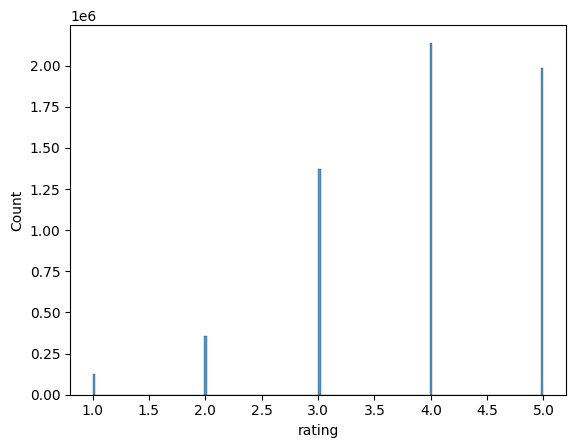

In [8]:
sns.histplot(ratings.rating)

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df, train_y, test_y = train_test_split(ratings[['user_id', 'book_id']], ratings.rating, train_size=0.8)

In [10]:
books = pd.read_csv('books.csv')

In [11]:
books.head(10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,Pride and Prejudice,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [12]:
list(books)

['book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [ ]:
#genres_df = pd.read_json('goodreads_book_genres_initial.json', lines=True)

In [ ]:
#genres_df = genres_df[genres_df.book_id.isin(books.goodreads_book_id)]

In [ ]:
#genres_df.columns = ['book_id', 'genres_dict']

In [ ]:
#genres_df.head(5)

#### Жанры скачиваем с `https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_book_genres_initial.json.gz`

In [13]:
import requests
import gzip
import shutil

# URL файла
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_book_genres_initial.json.gz'

# Скачивание файла
response = requests.get(url, stream=True)
with open('/content/goodreads_book_genres_initial.json.gz', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

# Распаковка файла
with gzip.open('/content/goodreads_book_genres_initial.json.gz', 'rb') as f_in:
    with open('/content/goodreads_book_genres_initial.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Проверка содержимого директории
!ls -l /content/

total 218916
drwxr-xr-x 6 root root      4096 Jul 26 10:28 goodbooks-10k
-rw-r--r-- 1 root root 199903667 Jul 26 10:29 goodreads_book_genres_initial.json
-rw-r--r-- 1 root root  24253992 Jul 26 10:29 goodreads_book_genres_initial.json.gz
drwxr-xr-x 1 root root      4096 Jul 24 13:22 sample_data


In [14]:
genres_df = pd.read_json('/content/goodreads_book_genres_initial.json', lines=True)

In [15]:
genres_df = genres_df[genres_df.book_id.isin(books.goodreads_book_id)]

In [16]:
genres_df.columns = ['book_id', 'genres_dict']

In [17]:
genres_df.head(5)

,book_id,genres_dict
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
15,89375,"{'non-fiction': 534, 'history, historical fict..."
583,54270,"{'history, historical fiction, biography': 108..."
807,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,..."
816,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ..."


In [18]:
all_genres = set()
for dict_genre in genres_df.genres_dict:
    for elem in list(dict_genre.keys()):
        all_genres.add(elem)

all_genres

{'children',
 'comics, graphic',
 'fantasy, paranormal',
 'fiction',
 'history, historical fiction, biography',
 'mystery, thriller, crime',
 'non-fiction',
 'poetry',
 'romance',
 'young-adult'}

In [19]:
for genre in all_genres:
    genres_df[genre] = 0

In [20]:
def simple_one_hot(genre_dict, genre):
    if genre in genre_dict:
        return 1
    return 0

In [21]:
for genre in all_genres:
    genres_df[genre] = genres_df.apply(lambda df: simple_one_hot(df['genres_dict'], genre), axis=1)

In [22]:
genres_df

,book_id,genres_dict,young-adult,"mystery, thriller, crime","history, historical fiction, biography","comics, graphic",poetry,romance,non-fiction,children,"fantasy, paranormal",fiction
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri...",0,1,0,0,0,1,0,0,0,1
15,89375,"{'non-fiction': 534, 'history, historical fict...",0,0,1,1,0,0,1,0,0,1
583,54270,"{'history, historical fiction, biography': 108...",0,0,1,1,0,0,1,0,0,0
807,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,...",0,0,0,0,0,1,0,0,1,1
816,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ...",0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2359417,7663,"{'fiction': 409, 'mystery, thriller, crime': 4...",0,1,0,0,0,0,1,0,0,1
2359672,6280379,"{'fiction': 1254, 'history, historical fiction...",0,0,1,0,0,0,0,0,1,1
2360252,6871646,"{'children': 1036, 'fiction': 57, 'fantasy, pa...",0,0,0,0,1,0,0,1,1,1
2360258,7657484,"{'comics, graphic': 1535, 'fiction': 70, 'fant...",1,0,1,1,0,0,0,0,1,1


In [23]:
train_df = train_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')

In [24]:
train_df = train_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

In [25]:
train_df.head(5)

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,young-adult,"mystery, thriller, crime","history, historical fiction, biography","comics, graphic",poetry,romance,non-fiction,children,"fantasy, paranormal",fiction
0,17548,11,77203,77203.0,"{'fiction': 18809, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2378,1574,18423,18423.0,"{'fiction': 1781, 'fantasy, paranormal': 793}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,37941,177,7144,7144.0,"{'fiction': 6877, 'mystery, thriller, crime': ...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41144,1531,262430,262430.0,"{'fantasy, paranormal': 2609, 'fiction': 736, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,12775,181,168642,168642.0,"{'non-fiction': 8049, 'mystery, thriller, crim...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
users_profiles = train_df.groupby('user_id')[list(all_genres)].sum()

In [27]:
users_profiles.columns = ['user_'+name for name in list(users_profiles)]

In [28]:
users_profiles

,user_young-adult,"user_mystery, thriller, crime","user_history, historical fiction, biography","user_comics, graphic",user_poetry,user_romance,user_non-fiction,user_children,"user_fantasy, paranormal",user_fiction
user_id,,,,,,,,,,
1,37.0,23.0,72.0,9.0,3.0,36.0,22.0,7.0,26.0,94.0
2,21.0,10.0,27.0,7.0,3.0,18.0,31.0,11.0,13.0,37.0
3,21.0,21.0,54.0,12.0,11.0,14.0,23.0,7.0,22.0,69.0
4,65.0,39.0,61.0,9.0,4.0,27.0,22.0,33.0,52.0,112.0
5,20.0,65.0,19.0,2.0,1.0,20.0,1.0,10.0,31.0,79.0
...,...,...,...,...,...,...,...,...,...,...
53420,55.0,33.0,37.0,7.0,0.0,54.0,11.0,17.0,46.0,86.0
53421,26.0,34.0,52.0,7.0,2.0,24.0,25.0,8.0,43.0,76.0
53422,69.0,54.0,41.0,20.0,9.0,48.0,11.0,18.0,93.0,106.0


In [29]:
train_df.columns = ['book_'+item if item in all_genres else item for item in list(train_df)]

In [30]:
train_df

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,book_young-adult,"book_mystery, thriller, crime","book_history, historical fiction, biography","book_comics, graphic",book_poetry,book_romance,book_non-fiction,book_children,"book_fantasy, paranormal",book_fiction
0,17548,11,77203,77203.0,"{'fiction': 18809, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2378,1574,18423,18423.0,"{'fiction': 1781, 'fantasy, paranormal': 793}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,37941,177,7144,7144.0,"{'fiction': 6877, 'mystery, thriller, crime': ...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41144,1531,262430,262430.0,"{'fantasy, paranormal': 2609, 'fiction': 736, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,12775,181,168642,168642.0,"{'non-fiction': 8049, 'mystery, thriller, crim...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781178,50815,350,7745,7745.0,"{'fiction': 2334, 'non-fiction': 1072, 'histor...",0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4781179,20776,433,42899,42899.0,"{'romance': 6453, 'fantasy, paranormal': 8706,...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4781180,583,158,6310,6310.0,"{'children': 10594, 'fantasy, paranormal': 282...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4781181,11090,485,4934,4934.0,"{'fiction': 1002, 'history, historical fiction...",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# задание 1 заканчивается здесь!

In [ ]:
# задание 2

Рекомендательные системы можно свести к различным задачам машинного обучения, в зависимости от подхода. Рассмотрим два подхода и выберем наиболее подходящий для нашей задачи.

### 1. Классификация

**Описание:**
В этом подходе мы можем формулировать задачу как классификацию, где для каждого пользователя предсказываем вероятность того, что он понравится конкретной книге. Это многоклассовая классификация, где классы — это книги.

**Метрики:**
- **Accuracy**: Доля правильно предсказанных книг.
- **Precision**: Доля правильно предсказанных положительных случаев среди всех предсказанных положительных.
- **Recall**: Доля правильно предсказанных положительных случаев среди всех реальных положительных.
- **F1-Score**: Гармоническое среднее между precision и recall.
- **AUC-ROC**: Площадь под ROC кривой, измеряющая способность модели различать положительные и отрицательные классы.

### 2. Регрессия

**Описание:**
Здесь задача формулируется как предсказание рейтинга или вероятности того, что пользователь поставит определенную оценку книге. Это подход на основе регрессии, где предсказываем непрерывную величину (рейтинг).

**Метрики:**
- **Mean Squared Error (MSE)**: Среднеквадратичная ошибка предсказанных рейтингов.
- **Root Mean Squared Error (RMSE)**: Корень из MSE, более интерпретируемая метрика.
- **Mean Absolute Error (MAE)**: Средняя абсолютная ошибка предсказанных рейтингов.
- **R² (Coefficient of Determination)**: Показывает, какая доля вариативности зависимой переменной объясняется независимыми переменными.

### Выбор подхода и обоснование

Для нашей задачи построения рекомендательной системы более подходящим является **подход на основе регрессии**. Вот несколько причин:

1. **Точность и детальность предсказаний**:
    - Предсказание вероятности или рейтинга более гибко, чем бинарная классификация (нравится/не нравится).
    - Рейтинги дают более точное представление о предпочтениях пользователей.

2. **Учет интенсивности предпочтений**:
    - Регрессионный подход учитывает, насколько сильно пользователь предпочитает определенную книгу, а не просто факт предпочитания.

3. **Обработка новых книг и пользователей**:
    - При появлении новых книг или пользователей модель на основе регрессии может адаптироваться и предсказывать вероятности или рейтинги, что упрощает расширение системы.

### Метрики для регрессионной модели

Для оценки качества модели будем использовать следующие метрики:

- **RMSE**: Поскольку это интерпретируемая метрика, показывающая среднюю ошибку предсказания в тех же единицах, что и рейтинги.
- **MAE**: Средняя абсолютная ошибка, которая менее чувствительна к выбросам по сравнению с RMSE.
- **R²**: Коэффициент детерминации, чтобы понять, насколько хорошо наши предикторы объясняют вариативность рейтингов.

Таким образом, мы сводим задачу рекомендательной системы к задаче регрессии с целью предсказания рейтингов книг для пользователей, что позволит нам предоставлять более персонализированные и точные рекомендации.

In [ ]:
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('english'))
# X = vectorizer.fit_transform(books.title)

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание объекта TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20, stop_words=stopwords.words('english')) #max_features=100

# Преобразование текста
X = vectorizer.fit_transform(books.title)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vectorizer.vocabulary_

{'girl': 5,
 'chronicles': 2,
 'time': 15,
 'love': 10,
 'little': 9,
 'life': 8,
 'book': 1,
 'world': 19,
 'night': 12,
 'dark': 3,
 'trilogy': 16,
 'one': 13,
 'man': 11,
 'story': 14,
 'last': 7,
 'vampire': 17,
 'house': 6,
 'death': 4,
 'black': 0,
 'vol': 18}

In [ ]:
train_df = train_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

In [ ]:
tf_idf_df = pd.DataFrame(X.toarray(), columns=vectorizer.vocabulary_)

In [ ]:
books = pd.concat([books, tf_idf_df], axis=1)

In [ ]:
train_df = train_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

In [ ]:
# Сохранение DataFrame в CSV файл
train_df.to_csv('train_df_.csv', index=False)

#test_df.to_csv('test_df_.csv', index=False)

train_y.to_csv('train_y_.csv', index=False)

test_y.to_csv('test_y_.csv', index=False)


In [ ]:
import psutil
# Информация о потреблении памяти различными процессами
def get_memory_info():
    process = psutil.Process()
    mem_info = process.memory_info()
    mem_usage = mem_info.rss / (1024 ** 2)  # в мегабайтах
    return mem_usage

print(f"\nИспользование памяти текущим процессом: {get_memory_info()} MB")


Использование памяти текущим процессом: 5774.6875 MB


In [ ]:
import pandas as pd
import sys
import gc

# Функция для получения размера объекта в памяти
def get_size(obj):
    return sys.getsizeof(obj) / (1024 ** 2)  # размер в мегабайтах

# Функция для поиска всех объектов DataFrame
def find_dataframes():
    dataframes = []
    for obj in gc.get_objects():
        try:
            if isinstance(obj, pd.DataFrame):
                dataframes.append(obj)
        except:
            continue
    return dataframes

# Найти все DataFrame объекты
dfs = find_dataframes()

# Вывод размера каждого DataFrame
for i, df in enumerate(dfs, 1):
    print(f'DataFrame {i} занимает {get_size(df):.2f} MB')


DataFrame 1 занимает 0.82 MB
DataFrame 2 занимает 0.15 MB
DataFrame 3 занимает 136.79 MB
DataFrame 4 занимает 0.00 MB
DataFrame 5 занимает 27.36 MB
DataFrame 6 занимает 0.01 MB
DataFrame 7 занимает 3.11 MB
DataFrame 8 занимает 0.00 MB
DataFrame 9 занимает 0.00 MB
DataFrame 10 занимает 4.48 MB
DataFrame 11 занимает 4.48 MB
DataFrame 12 занимает 1.53 MB
DataFrame 13 занимает 8.61 MB
DataFrame 14 занимает 2699.52 MB


In [71]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
cols_for_using = [
 'book_mystery, thriller, crime',
 'book_non-fiction',
 'book_romance',
 'book_fantasy, paranormal',
 'book_poetry',
 'book_fiction',
 'book_young-adult',
 'book_history, historical fiction, biography',
 'book_comics, graphic',
 'book_children',
 'user_mystery, thriller, crime',
 'user_non-fiction',
 'user_romance',
 'user_fantasy, paranormal',
 'user_poetry',
 'user_fiction',
 'user_young-adult',
 'user_history, historical fiction, biography',
 'user_comics, graphic',
 'user_children']+list(vectorizer.vocabulary_)

In [ ]:
train_df.fillna(0, inplace=True)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier.fit(train_df[cols_for_using], train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
test_df = test_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')
test_df = test_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

test_df.columns = ['book_'+item if item in all_genres else item for item in list(test_df)]

test_df = test_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

test_df = test_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

In [ ]:
test_df.fillna(0, inplace=True)

In [ ]:
test_df.to_csv('test_df_.csv', index=False)

In [ ]:
predictions = classifier.predict(test_df[cols_for_using])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

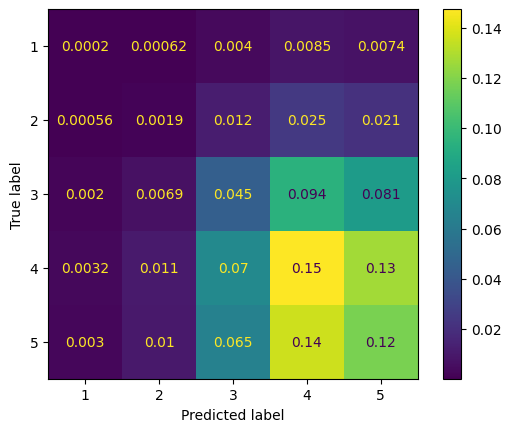

In [ ]:
cm = confusion_matrix(test_y, predictions, labels=classifier.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
precision_score(test_y, predictions, average='micro')

0.3122741145289535

precision_score = 0.31117982491366153 при `max_features=100`

`vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('english')) #max_features=100`

Как видим, уменьшение количества слов в `vectorizer` снижает метрику незначительно. Но благодаря этомы мы решаем проблему перегрузки ОЗУ. Готовые датасеты также сохраняем в целях защиты от потери в случае перегрузки.

In [ ]:
# Сохранение DataFrame в CSV файл
test_df.to_csv('test_df_.csv', index=False)


# Задача 2

#### Создание описательных признаков
Создание описательных признаков для пользователей и книг позволяет улучшить модели машинного обучения, предоставляя дополнительную информацию для анализа. Вот как можно создать такие признаки и объяснить их выбор: Средний рейтинг книг пользователя

Как создать:

Из таблицы, содержащей рейтинги книг и информацию о пользователях, можно вычислить средний рейтинг для каждого пользователя.

In [ ]:
import pandas as pd
# Загрузка файла в DataFrame
train_df = pd.read_csv('/content/goodbooks-10k/train_df.csv')
test_df = pd.read_csv('/content/goodbooks-10k/test_df.csv')

In [ ]:
user_avg_ratings = ratings.groupby('user_id')['rating'].mean().reset_index()
user_avg_ratings.rename(columns={'rating': 'user_avg_rating'}, inplace=True)

# Объединение с основным DataFrame
train_df = train_df.merge(user_avg_ratings, on='user_id', how='left')


#### Описательный признак про книги
Признак: Популярность книги

Как создать:


Из таблицы, содержащей количество отзывов или рейтингов, можно вычислить количество отзывов или рейтингов для каждой книги.

In [ ]:
book_popularity = ratings.groupby('book_id').size().reset_index(name='book_popularity')

# Объединение с основным DataFrame
books = books.merge(book_popularity, on='book_id', how='left')
# Объединение train_df и books по столбцу 'goodreads_book_id'
train_df = train_df.merge(books[['goodreads_book_id', 'book_popularity']],
                          on='goodreads_book_id', how='left')

In [ ]:
train_df.columns

Index(['user_id', 'book_id_x', 'goodreads_book_id', 'book_id_y', 'genres_dict',
       'book_romance', 'book_comics, graphic',
       'book_history, historical fiction, biography', 'book_children',
       'book_poetry', 'book_fantasy, paranormal', 'book_young-adult',
       'book_fiction', 'book_mystery, thriller, crime', 'book_non-fiction',
       'user_romance', 'user_comics, graphic',
       'user_history, historical fiction, biography', 'user_children',
       'user_poetry', 'user_fantasy, paranormal', 'user_young-adult',
       'user_fiction', 'user_mystery, thriller, crime', 'user_non-fiction',
       'girl', 'chronicles', 'time', 'love', 'little', 'life', 'book', 'world',
       'night', 'dark', 'trilogy', 'one', 'man', 'story', 'last', 'vampire',
       'house', 'death', 'black', 'vol', 'book_id', 'user_avg_rating',
       'book_popularity'],
      dtype='object')

In [ ]:
train_df.fillna(0, inplace=True)

In [ ]:
cols_for_using = [
 'book_mystery, thriller, crime',
 'book_non-fiction',
 'book_romance',
 'book_fantasy, paranormal',
 'book_poetry',
 'book_fiction',
 'book_young-adult',
 'book_history, historical fiction, biography',
 'book_comics, graphic',
 'book_children',
 'user_mystery, thriller, crime',
 'user_non-fiction',
 'user_romance',
 'user_fantasy, paranormal',
 'user_poetry',
 'user_fiction',
 'user_young-adult',
 'user_history, historical fiction, biography',
 'user_comics, graphic',
 'user_children', 'user_avg_rating', 'book_popularity'] # +list(vectorizer.vocabulary_)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier.fit(train_df[cols_for_using], train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# test_df = test_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')
# test_df = test_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

# test_df.columns = ['book_'+item if item in all_genres else item for item in list(test_df)]

# test_df = test_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

# test_df = test_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

In [ ]:
# user_avg_ratings = ratings.groupby('user_id')['rating'].mean().reset_index()
# user_avg_ratings.rename(columns={'rating': 'user_avg_rating'}, inplace=True)

# Объединение с основным DataFrame
test_df = test_df.merge(user_avg_ratings, on='user_id', how='left')


In [ ]:
#book_popularity = ratings.groupby('book_id').size().reset_index(name='book_popularity')

# Объединение с основным DataFrame
# books = books.merge(book_popularity, on='book_id', how='left')
# Объединение train_df и books по столбцу 'goodreads_book_id'
test_df = test_df.merge(books[['goodreads_book_id', 'book_popularity']],
                          on='goodreads_book_id', how='left')

In [ ]:
test_df.fillna(0, inplace=True)

In [ ]:
predictions = classifier.predict(test_df[cols_for_using])

In [84]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

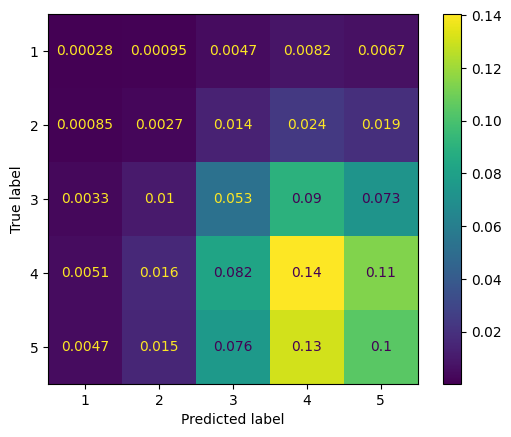

In [ ]:
cm = confusion_matrix(test_y, predictions, labels=classifier.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
precision_score(test_y, predictions, average='micro')

0.30075897518271627

## Выводы по Задаче 2:
Добавление признаков
* Средний рейтинг книг пользователя
* Популярность книги

улучшило метрику precision_score `0.3120` на `0.3007`


Сохраним датасеты

In [ ]:
# # Сохранение DataFrame в CSV файл
# train_df.to_csv('train_df_.csv', index=False)

# test_df.to_csv('test_df_.csv', index=False)

# train_y.to_csv('train_y_.csv', index=False)

# test_y.to_csv('test_y_.csv', index=False)


In [ ]:
# train_df, test_df, train_y, test_y

# Задача 3
Давайте попробуем добавить ещё несколько признаков, основанных на тексте.

In [31]:
import requests
import pandas as pd
import time

# Пример DataFrame с ISBN
df = books.copy()

In [32]:
# def get_book_info(isbn):
#     url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}'
#     response = requests.get(url)
#     if response.status_code == 200:
#         return response.json()
#     else:
#         return None


In [ ]:
# book_info_list = []
# i = 1
# for isbn in df['isbn']:
#     print(i)
#     book_info = get_book_info(isbn)
#     print(book_info)
#     if book_info:
#         book_info_list.append(book_info)
#     else:
#         book_info_list.append({'isbn': isbn, 'info': 'No data found'})
#     #time.sleep(0.001)  # Задержка между запросами, чтобы избежать превышения лимита запросов
#     i+=1
# # Пример сохранения данных в DataFrame
# book_info_df = pd.DataFrame(book_info_list)


Используем данные из имеющегося файла `book_tags.csv`
* goodreads_book_id:

Это идентификатор книги в базе данных Goodreads. Каждый элемент представляет уникальный ID, связанный с конкретной книгой на платформе Goodreads.
* tag_id:

Это идентификатор тега, связанный с книгой. Теги используются для классификации и поиска книг по различным категориям, жанрам и темам. Каждый элемент представляет уникальный ID, связанный с конкретным тегом.
* count:

Это количество раз, когда данный тег был применен к книге. Этот столбец указывает, насколько часто пользователи Goodreads использовали этот тег для данной книги. Чем выше значение, тем популярнее или более релевантным считается тег для этой книги.

In [32]:
book_tags = pd.read_csv('/content/goodbooks-10k/book_tags.csv')

In [33]:
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [34]:
import zipfile
import os
import pandas as pd
import xml.etree.ElementTree as ET

# Путь к ZIP-архиву
zip_path = '/content/goodbooks-10k/books_xml/books_xml.zip'
extract_path = '/content/goodbooks-10k/books_xml/extracted/'

# Распаковка ZIP-архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [35]:
import os

# Путь к директории
directory_path = '/content/goodbooks-10k/books_xml/extracted/books_xml'

# Подсчет количества файлов в директории
num_files = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])

print(f"Количество файлов в директории: {num_files}")


Количество файлов в директории: 10000


In [36]:
import xml.etree.ElementTree as ET

# Путь к XML-файлу
file_path = '/content/goodbooks-10k/books_xml/extracted/books_xml/10.xml'

# Чтение и парсинг XML-файла
tree = ET.parse(file_path)
root = tree.getroot()

# Функция для печати содержимого XML-файла
def print_xml(root, indent=0):
    for child in root:
        print(" " * indent + f"{child.tag}: {child.text}")
        if len(child):
            print_xml(child, indent + 2)

# Печать содержимого XML-файла
print_xml(root)



Request: 
    
  authentication: true
  key: all_men_must_serve
  method: book_show
book: 
  
  id: 10
  title: Harry Potter Collection (Harry Potter, #1-6)
  isbn: 0439827604
  isbn13: 9780439827607
  asin: None
  kindle_asin: None
  marketplace_id: None
  country_code: GB
  image_url: https://images.gr-assets.com/books/1328867351m/10.jpg
  small_image_url: https://images.gr-assets.com/books/1328867351s/10.jpg
  publication_year: 2005
  publication_month: 9
  publication_day: 12
  publisher: Scholastic
  language_code: eng
  is_ebook: false
  description: Six years of magic, adventure, and mystery make this luxurious boxed set the perfect gift for Harry Potter fans of all ages. <br />Follow Harry from his first days at Hogwarts School for Witchcraft and Wizardry, through his many adventures with Hermione and Ron, to his confrontations with rival Draco Malfoy and the dreaded Professor Snape. From the thrilling search for the Sorcerer's Stone to the Triwizard Tournament to the return of

In [ ]:
import xml.etree.ElementTree as ET

# Путь к XML-файлу
file_path = '/content/goodbooks-10k/books_xml/extracted/books_xml/10006.xml'

# Чтение и парсинг XML-файла
tree = ET.parse(file_path)
root = tree.getroot()

# Функция для печати элементов с тегом 'description'
def print_description_elements(element, indent=0):
    for child in element:
        if child.tag == 'isbn':
            print(" " * indent + f"{child.tag}: {child.text.strip() if child.text else 'No description'}")
        if len(child):
            print_description_elements(child, indent + 2)

# Печать элементов с тегом 'description'
print_description_elements(root)


  isbn: 0965913228
      isbn: 0786715626
      isbn: 1880684241
      isbn: 0807083879
      isbn: 0385721307
      isbn: 0974207454
      isbn: 074322616X
      isbn: 0743255992
      isbn: 1931082014
      isbn: 1862077207
      isbn: 0767913310
      isbn: 0743255496
      isbn: 0156031221
      isbn: 1400034892
      isbn: 0141015403
      isbn: 0394714504
      isbn: 1400076528
      isbn: 1571312447
      isbn: 0826215688


In [42]:
# Фильтрация строк, где 'original_title' равно 'Harry Potter Collection'
filtered_books = books[books['title'] == 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)']

# Вывод отфильтрованных строк
filtered_books


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
26,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...


In [45]:
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [46]:
# Проверим, есть ли пропуски в столбце 'best_book_id'
missing_isbns = books['best_book_id'].isnull().sum()

if missing_isbns > 0:
    print(f'Обнаружено {missing_isbns} пропусков в столбце best_book_id.')

In [47]:
# Фильтрация строк, где 'original_title' равно 'Harry Potter Collection'
filtered_books = books[books['best_book_id'] == 10]

# Вывод отфильтрованных строк
filtered_books


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3752,3753,10,10,21457570,6,439827604,9.780440e+12,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",eng,4.73,24618,26274,882,203,186,946,3891,21048,https://images.gr-assets.com/books/1328867351m...,https://images.gr-assets.com/books/1328867351s...


### Столбец `best_book_id` не содержит пропусков, поэтому описания книг будем собирать по этому столбцу, потом векторизируем и добавим этот признак в нашу модель.

In [48]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

# Путь к папке с XML-файлами
folder_path = '/content/goodbooks-10k/books_xml/extracted/books_xml'

# Создаем пустой список для хранения данных
data = []

# Проходим по всем файлам в папке
for filename in os.listdir(folder_path):
    if filename.endswith('.xml'):
        file_path = os.path.join(folder_path, filename)

        # Парсим XML файл
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Ищем элементы best_book_id и description
        best_book_id = root.find('.//best_book_id').text if root.find('.//best_book_id') is not None else None
        description = root.find('.//description').text if root.find('.//description') is not None else None

        # Добавляем данные в список
        data.append([best_book_id, description])

# Создаем DataFrame
description_books = pd.DataFrame(data, columns=['best_book_id', 'description'])

# Просматриваем результат
description_books.head()


,best_book_id,description
0,20801166,"The creative writing teacher, the delivery guy..."
1,242472,A black swan is a highly improbable event with...
2,7082,"It was January 2021, and Rick Deckard had a li..."
3,105576,Five Point Someone is a story about three frie...
4,239105,When the vile Crystal Shard once again reveals...


In [49]:
description_books.shape

(10000, 2)

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Заполняем NaN значения в 'description' пустыми строками
description_books['description'].fillna('', inplace=True)



In [51]:
# Создаем объект TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Ограничиваем количество признаков (словарь)
    stop_words='english',  # Удаляем английские стоп-слова
    max_df=0.95,  # Игнорируем термины, которые появляются в более чем 95% документов
    min_df=2  # Игнорируем термины, которые появляются менее чем в 2 документах
)



In [52]:
# Применяем TfidfVectorizer к столбцу 'description'
tfidf_matrix = tfidf_vectorizer.fit_transform(description_books['description'])

# Преобразуем результат в DataFrame для лучшей наглядности
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Выводим первые несколько строк полученного DataFrame
tfidf_df.head()


,american,amp,author,away,beautiful,begins,best,bestselling,book,boy,br,children,city,come,comes,dangerous,dark,daughter,day,dead,death,does,doesn,edition,em,end,face,family,father,finds,friend,friends,future,girl,good,great,heart,help,high,history,home,house,human,journey,just,king,know,knows,left,life,like,little,live,lives,long,love,make,man,men,mother,murder,mysterious,new,night,novel,old,past,people,place,power,powerful,readers,school,secret,secrets,series,set,son,soon,stories,story,takes,tale,things,time,times,town,true,truth,wants,war,way,woman,women,work,world,year,years,york,young
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.295691,0.0,0.000000,0.0,0.401576,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.338333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.571970,0.0,0.000000,0.298241,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.351243,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.312035,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.277894,0.0,0.661112,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.586256,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.105212,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129889,0.000000,0.000000,0.0,0.123910,0.172443,0.000000,0.0,0.0,0.0,0.0,0.0,0.099975,0.0,0.0,0.000000,0.225201,0.0,0.090933,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.423923,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.905698,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.275847,0.0,0.421870,0.0,0.0,0.170893,0.175563,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.187239,0.0,0.0,0.0,0.000000,0.000000,0.174399,0.190558,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.14105,0.0,0.174581,0.0,0.0,0.102568,0.000000,0.0,0.381787,0.000000,0.0,0.128597,0.322271,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.128985,0.179293,0.0,0.368994,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.148858,0.0,0.0,0.000000,0.223543,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.237712,0.0,0.0,0.0,0.470082,0.0,0.208719,0.0,0.106402,0.0,0.0,0.000000,0.000000,0.0,0.257848,0.0,0.0,0.0,0.0,0.0,0.0,0.291869,0.0,0.000000,0.0,0.0,0.0,0.255681,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.261573,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.320528,0.0,0.217451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.248181,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.338287,0.0,0.000000,0.236875,0.0


In [53]:
# Добавляем столбец 'best_book_id' для последующего объединения
tfidf_df['best_book_id'] = description_books['best_book_id']

In [54]:
tfidf_df.head()

,american,amp,author,away,beautiful,begins,best,bestselling,book,boy,br,children,city,come,comes,dangerous,dark,daughter,day,dead,death,does,doesn,edition,em,end,face,family,father,finds,friend,friends,future,girl,good,great,heart,help,high,history,home,house,human,journey,just,king,know,knows,left,life,...,little,live,lives,long,love,make,man,men,mother,murder,mysterious,new,night,novel,old,past,people,place,power,powerful,readers,school,secret,secrets,series,set,son,soon,stories,story,takes,tale,things,time,times,town,true,truth,wants,war,way,woman,women,work,world,year,years,york,young,best_book_id
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.295691,0.0,0.000000,0.0,0.401576,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.338333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.298241,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.351243,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.312035,0.000000,0.0,0.000000,0.000000,0.0,20801166
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.277894,0.0,0.661112,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.586256,0.0,0.0,0.000000,...,0.0,0.000000,0.105212,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129889,0.000000,0.000000,0.0,0.123910,0.172443,0.000000,0.0,0.0,0.0,0.0,0.0,0.099975,0.0,0.0,0.000000,0.225201,0.0,0.090933,0.000000,0.0,242472
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.423923,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,7082
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.275847,0.0,0.421870,0.0,0.0,0.170893,0.175563,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.187239,0.0,0.0,0.0,0.000000,0.000000,0.174399,0.190558,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.14105,0.0,0.174581,0.0,0.0,0.102568,...,0.0,0.381787,0.000000,0.0,0.128597,0.322271,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.128985,0.179293,0.0,0.368994,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.148858,0.0,0.0,0.000000,0.223543,0.0,0.000000,0.000000,0.0,105576
4,0.0,0.0,0.237712,0.0,0.0,0.0,0.470082,0.0,0.208719,0.0,0.106402,0.0,0.0,0.000000,0.000000,0.0,0.257848,0.0,0.0,0.0,0.0,0.0,0.0,0.291869,0.0,0.000000,0.0,0.0,0.0,0.255681,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.261573,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.320528,0.0,0.217451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.248181,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.338287,0.0,0.000000,0.236875,0.0,239105


In [57]:
train_df.head(5)

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,book_young-adult,"book_mystery, thriller, crime","book_history, historical fiction, biography","book_comics, graphic",book_poetry,book_romance,book_non-fiction,book_children,"book_fantasy, paranormal",book_fiction
0,17548,11,77203,77203.0,"{'fiction': 18809, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2378,1574,18423,18423.0,"{'fiction': 1781, 'fantasy, paranormal': 793}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,37941,177,7144,7144.0,"{'fiction': 6877, 'mystery, thriller, crime': ...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41144,1531,262430,262430.0,"{'fantasy, paranormal': 2609, 'fiction': 736, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,12775,181,168642,168642.0,"{'non-fiction': 8049, 'mystery, thriller, crim...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [61]:
# Проверяем тип столбца 'best_book_id' в train_df
print(train_df['goodreads_book_id'].dtype)

int64


In [62]:
# Проверяем тип столбца 'best_book_id' в books и tfidf_df
print(books['best_book_id'].dtype)
print(tfidf_df['best_book_id'].dtype)

int64
object


In [63]:
# Приведение типа столбца 'best_book_id' в books и tfidf_df к int64
books['best_book_id'] = books['best_book_id'].astype('int64')
tfidf_df['best_book_id'] = tfidf_df['best_book_id'].astype('int64')

In [64]:
# Объединение DataFrame по столбцу 'best_book_id'
tfidf_df = pd.merge(tfidf_df, books[['best_book_id', 'goodreads_book_id']], on='best_book_id', how='left')

In [65]:
tfidf_df

,american,amp,author,away,beautiful,begins,best,bestselling,book,boy,br,children,city,come,comes,dangerous,dark,daughter,day,dead,death,does,doesn,edition,em,end,face,family,father,finds,friend,friends,future,girl,good,great,heart,help,high,history,home,house,human,journey,just,king,know,knows,left,life,...,live,lives,long,love,make,man,men,mother,murder,mysterious,new,night,novel,old,past,people,place,power,powerful,readers,school,secret,secrets,series,set,son,soon,stories,story,takes,tale,things,time,times,town,true,truth,wants,war,way,woman,women,work,world,year,years,york,young,best_book_id,goodreads_book_id
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.295691,0.0,0.000000,0.0,0.401576,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.338333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.298241,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.351243,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.312035,0.000000,0.000000,0.000000,0.000000,0.000000,20801166,20801166
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.277894,0.0,0.661112,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.586256,0.000000,0.0,0.000000,...,0.000000,0.105212,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.129889,0.000000,0.000000,0.0,0.123910,0.172443,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.099975,0.0,0.0,0.000000,0.225201,0.000000,0.090933,0.000000,0.000000,242472,242472
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.423923,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7082,7082
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.275847,0.0,0.421870,0.000000,0.0,0.170893,0.175563,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.187239,0.0,0.00000,0.0,0.000000,0.000000,0.174399,0.190558,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.14105,0.0,0.174581,0.000000,0.0,0.102568,...,0.381787,0.000000,0.0,0.128597,0.322271,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.128985,0.179293,0.0,0.368994,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.148858,0.0,0.0,0.000000,0.223543,0.000000,0.000000,0.000000,0.000000,105576,105576
4,0.0,0.0,0.237712,0.0,0.0,0.0,0.470082,0.0,0.208719,0.0,0.106402,0.000000,0.0,0.000000,0.000000,0.00000,0.257848,0.000000,0.0,0.0,0.0,0.0,0.0,0.291869,0.0,0.000000,0.0,0.00000,0.0,0.255681,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.261573,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.320528,0.000000,0.217451,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.248181,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.338287,0.000000,0.000000,0.236875,0.000000,239105,239105
...,...,..

### В связи с нехваткой ОЗУ добавим только 20 слов из описаний книг как признаки (при лучших ресурсах - можно значительно больше)

In [67]:
import pandas as pd

# Выбираем первые 20 столбцов из tfidf_df
columns_to_merge = ['goodreads_book_id'] + list(tfidf_df.columns[1:21])

# Объединение train_df и tfidf_df по столбцу 'goodreads_book_id'
train_df = pd.merge(train_df, tfidf_df[columns_to_merge], on='goodreads_book_id', how='left')

# Проверяем результат
train_df


,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,book_young-adult,"book_mystery, thriller, crime","book_history, historical fiction, biography","book_comics, graphic",book_poetry,book_romance,book_non-fiction,book_children,"book_fantasy, paranormal",book_fiction,amp,author,away,beautiful,begins,best,bestselling,book,boy,br,children,city,come,comes,dangerous,dark,daughter,day,dead,death
0,17548,11,77203,77203.0,"{'fiction': 18809, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.172450,0.396375,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.153859,0.0,0.0
1,2378,1574,18423,18423.0,"{'fiction': 1781, 'fantasy, paranormal': 793}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.232572,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
2,37941,177,7144,7144.0,"{'fiction': 6877, 'mystery, thriller, crime': ...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.222279,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
3,41144,1531,262430,262430.0,"{'fantasy, paranormal': 2609, 'fiction': 736, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.348453,0.0,0.0,0.0,0.000000,0.191715,0.0,0.203575,0.077986,0.0,0.0,0.0,0.0,0.412097,0.188985,0.00000,0.000000,0.0,0.0
4,12775,181,168642,168642.0,"{'non-fiction': 8049, 'mystery, thriller, crim...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.340057,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781178,50815,350,7745,7745.0,"{'fiction': 2334, 'non-fiction': 1072, 'histor...",0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.373672,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
4781179,20776,433,42899,42899.0,"{'romance': 6453, 'fantasy, paranormal': 8706,...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.263328,0.0,0.0,0.0,0.0,0.000000,0.000000,0.36282,0.000000,0.0,0.0
4781180,583,158,6310,6310.0,"{'children': 10594, 'fantasy, paranormal': 282...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
4781181,11090,485,4934,4934.0,"{'fiction': 1002, 'history, historical fiction...",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.296086,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0


In [68]:
columns_to_merge

['goodreads_book_id',
 'amp',
 'author',
 'away',
 'beautiful',
 'begins',
 'best',
 'bestselling',
 'book',
 'boy',
 'br',
 'children',
 'city',
 'come',
 'comes',
 'dangerous',
 'dark',
 'daughter',
 'day',
 'dead',
 'death']

In [69]:
cols_for_using = ['amp',
 'author',
 'away',
 'beautiful',
 'begins',
 'best',
 'bestselling',
 'book',
 'boy',
 'br',
 'children',
 'city',
 'come',
 'comes',
 'dangerous',
 'dark',
 'daughter',
 'day',
 'dead',
 'death']

In [72]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

classifier.fit(train_df[cols_for_using], train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [76]:
train_df

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,book_young-adult,"book_mystery, thriller, crime","book_history, historical fiction, biography","book_comics, graphic",book_poetry,book_romance,book_non-fiction,book_children,"book_fantasy, paranormal",book_fiction,amp,author,away,beautiful,begins,best,bestselling,book,boy,br,children,city,come,comes,dangerous,dark,daughter,day,dead,death
0,17548,11,77203,77203.0,"{'fiction': 18809, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.172450,0.396375,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.153859,0.0,0.0
1,2378,1574,18423,18423.0,"{'fiction': 1781, 'fantasy, paranormal': 793}",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.232572,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
2,37941,177,7144,7144.0,"{'fiction': 6877, 'mystery, thriller, crime': ...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.222279,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
3,41144,1531,262430,262430.0,"{'fantasy, paranormal': 2609, 'fiction': 736, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.348453,0.0,0.0,0.0,0.000000,0.191715,0.0,0.203575,0.077986,0.0,0.0,0.0,0.0,0.412097,0.188985,0.00000,0.000000,0.0,0.0
4,12775,181,168642,168642.0,"{'non-fiction': 8049, 'mystery, thriller, crim...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.340057,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781178,50815,350,7745,7745.0,"{'fiction': 2334, 'non-fiction': 1072, 'histor...",0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.373672,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
4781179,20776,433,42899,42899.0,"{'romance': 6453, 'fantasy, paranormal': 8706,...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.263328,0.0,0.0,0.0,0.0,0.000000,0.000000,0.36282,0.000000,0.0,0.0
4781180,583,158,6310,6310.0,"{'children': 10594, 'fantasy, paranormal': 282...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0
4781181,11090,485,4934,4934.0,"{'fiction': 1002, 'history, historical fiction...",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.296086,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0


In [94]:
test_df = test_df.merge(books[['book_id', 'goodreads_book_id']], left_on='book_id', right_on='book_id', how='left')
test_df = test_df.merge(genres_df, left_on='goodreads_book_id', right_on='book_id', how='left')

test_df.columns = ['book_'+item if item in all_genres else item for item in list(test_df)]

test_df = test_df.merge(users_profiles, left_on='user_id', right_on='user_id', how='left')

#test_df = test_df.merge(books[list(vectorizer.vocabulary_)+['book_id']], left_on='book_id_x', right_on='book_id')

KeyError: 'book_id'

In [79]:
test_df

,user_id,book_id_x,goodreads_book_id,book_id_y,genres_dict,book_young-adult,"book_mystery, thriller, crime","book_history, historical fiction, biography","book_comics, graphic",book_poetry,book_romance,book_non-fiction,book_children,"book_fantasy, paranormal",book_fiction,user_young-adult,"user_mystery, thriller, crime","user_history, historical fiction, biography","user_comics, graphic",user_poetry,user_romance,user_non-fiction,user_children,"user_fantasy, paranormal",user_fiction
0,31676,3,41865,41865.0,"{'young-adult': 19627, 'fantasy, paranormal': ...",1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,34.0,31.0,53.0,14.0,5.0,42.0,8.0,4.0,43.0,80.0
1,50904,15,48855,48855.0,"{'non-fiction': 15486, 'history, historical fi...",1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,39.0,24.0,59.0,5.0,4.0,40.0,19.0,18.0,41.0,92.0
2,12138,1039,5899779,5899779.0,"{'fantasy, paranormal': 1878, 'romance': 650, ...",1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16.0,24.0,19.0,8.0,1.0,2.0,12.0,2.0,51.0,57.0
3,45246,2881,116296,116296.0,"{'fantasy, paranormal': 2378, 'fiction': 745, ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,48.0,74.0,41.0,27.0,1.0,35.0,7.0,17.0,84.0,102.0
4,35377,1480,13831,13831.0,"{'fantasy, paranormal': 7042, 'young-adult': 3...",1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,34.0,17.0,52.0,10.0,1.0,38.0,16.0,28.0,37.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195291,27084,4228,95406,95406.0,"{'fiction': 127, 'comics, graphic': 620, 'fant...",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,39.0,43.0,8.0,25.0,1.0,16.0,4.0,12.0,75.0,82.0
1195292,10220,7087,18054175,18054175.0,"{'fiction': 627, 'young-adult': 26, 'romance':...",1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,88.0,36.0,52.0,4.0,2.0,66.0,12.0,34.0,67.0,106.0
1195293,37255,47,19063,19063.0,"{'fiction': 25304, 'history, historical fictio...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0,58.0,11.0,0.0,0.0,35.0,1.0,1.0,23.0,74.0
1195294,26985,287,2122,2122.0,"{'fiction': 4332, 'romance': 52, 'non-fiction'...",0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,22.0,37.0,98.0,4.0,5.0,70.0,14.0,6.0,28.0,118.0


In [80]:
test_df.fillna(0, inplace=True)

In [81]:
# Объединение train_df и tfidf_df по столбцу 'goodreads_book_id'
test_df = pd.merge(test_df, tfidf_df[columns_to_merge], on='goodreads_book_id', how='left')

# Проверяем результат
test_df.shape

(1195296, 45)

In [82]:
predictions = classifier.predict(test_df[cols_for_using])

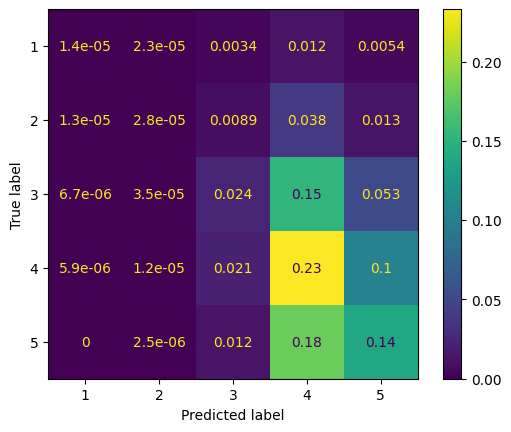

In [85]:
cm = confusion_matrix(test_y, predictions, labels=classifier.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [86]:
precision_score(test_y, predictions, average='micro')

0.39680882392311195

## Выводы:
* Классификатор на модели случайного леса всего на 20 словах из описаний книг показывает precision_score = 0.40 (что удовлетворяет критериям поставленной задачи).
* Модель лучше предсказывает рейтинг = 4, 5, 3
* Модель хуже предсказывает (почти не предсказывает) рейтинг = 1, 2
* Есть основания предположить, что при увеличении числа слов из описаний, метрика может улучшиться.